## Understanding Q Learning

In [0]:
import gym # ai gym

In [0]:
env = gym.make('FrozenLake-v0') # something called "Frozen Lake" environment

In [0]:
print(env.observation_space.n) # no of states
print(env.action_space.n) # no of states

16
4


In [0]:
env.reset()

0

In [0]:
action = env.action_space.sample()

In [0]:
new_state, reward, done, info = env.step(action)

In [0]:
env.render() # render the GUI for the enviornment

  (Up)
SFFF
FHFH
FFFH
HFFG


###Frozen Lake Enviornment
Now that we have a basic understanding of how the gym enviornment works it's time to discuss the specific problem we will be solving.

The enviornment we loaded above ```FrozenLake-v0``` is one of the simplest enviornments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice (render the enviornment above to see an example).

There are:
- 16 states (one for each square) 
- 4 possible actions (LEFT, RIGHT, DOWN, UP)
- 4 different types of blocks (F: frozen, H: hole, S: start, G: goal)

""copied from TF website""

## Building the Q table

In [0]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [0]:
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [0]:
EPISODES = 2000
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

In [0]:
epsilon = 0.9

if np.random.uniform(0,1)<epsilon:
    action = env.action_space.sample()
else:
    action = np.argmax(Q[state, :])

## Assembling all together

In [0]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 20000
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

epsilon = 0.9

RENDER = False

In [21]:
rewards = []
for episode in range(EPISODES):
    
    state = env.reset()
    for _ in range(MAX_STEPS):
        if RENDER:
            env.render()

        if np.random.uniform(0,1)<epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        next_state, reward, done, _ = env.step(action)

        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break # reached goal (G)
        
print(Q)
print(f"Average Reward: {sum(rewards)/len(rewards)}.")

[[2.86671071e-01 1.00114734e-02 1.13404209e-02 1.15803527e-02]
 [1.61939744e-03 5.73087387e-03 2.28923636e-03 2.34738873e-01]
 [4.71258600e-03 3.00218973e-03 5.82307194e-03 2.80417373e-01]
 [1.88871316e-03 3.25462108e-03 1.65652698e-03 1.74735693e-01]
 [4.58984907e-01 3.61381823e-03 4.42553868e-03 2.64134853e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.38841093e-03 4.36564659e-07 4.52508518e-07 1.30029359e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.94734439e-03 3.69279723e-03 5.36197385e-03 3.20169632e-01]
 [1.00822827e-03 3.71956901e-01 1.02431156e-03 2.70298487e-03]
 [5.76651121e-01 2.07204306e-04 6.25363070e-05 2.00214672e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.66215738e-02 5.98155740e-02 3.60698445e-01 3.02874474e-03]
 [7.78882876e-02 2.68818946e-01 6.88161437e-02 6.59969446e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

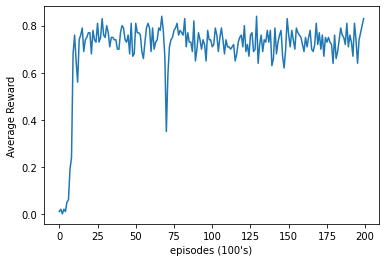

In [22]:
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('Average Reward')
plt.xlabel('episodes (100\'s)')
plt.show()